朴素贝叶斯（Naïve Bayes）算法是一种基于贝叶斯理论的有监督学习算法。之所以说“朴素”，是因为这个算法是基于样本特征之间互相独立的“朴素”假设。正因为如此，由于不用考虑样本特征之间的关系，朴素贝叶斯分类器的效率是非常高的。

In [1]:
import numpy as np
X = np.array([[0,1,0,1],
             [1,1,1,0],
             [0,1,1,0],
             [0,0,0,1],
             [0,1,1,0],
             [0,1,0,1],
             [1,0,0,1]])
y = np.array([0, 1, 1, 0, 1, 0, 0])
#对不同分类计算每个特征为1的数量
counts={}
for label in np.unique(y):
    counts[label]=X[y==label].sum(axis=0)
print('feature counts:\n{}',format(counts))

feature counts:
{} {0: array([1, 2, 0, 4]), 1: array([1, 3, 3, 0])}


下面我们来解释一下这个结果的意思，当y为0时，也就在没有下雨的4天当中，有1天刮了北风，有2天比较闷热，而没有出现多云的情况，但这4天天气预报全部播报有雨。同时，在y为1时，也就是在下雨的3天当中，有1天刮了北风，3天全都比较闷热，且3天全部出现了多云的现象，有意思的是，这3天的天气预报都没有播报有雨。

In [2]:
#导入贝努利贝叶斯
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(X,y)
#要预测的这一天，没有刮北风，不闷热，多云，天气预报没说有雨
Next_Day=[[0,0,1,0]]
pre=clf.predict(Next_Day)
print('\n\n\n代码运行结果：')
print('==========\n')
if pre==[1]:
    print('要下雨了，快收衣服！')
else:
    print('放心，又是一个艳阳天！')
print('\n==========')
print('\n\n\n')




代码运行结果：

要下雨了，快收衣服！







In [3]:
Another_Day=[[1,1,0,1]]
pre2=clf.predict(Another_Day)
print('\n\n\n代码运行结果：')
print('==========\n')
if pre2==[1]:
    print('要下雨了，快收衣服！')
else:
    print('放心，又是一个艳阳天！')
print('\n==========')
print('\n\n\n')




代码运行结果：

放心，又是一个艳阳天！







In [4]:
print('\n\n\n')
print('代码运行结果：')
print('==============================\n')
#模型预测分类的概率
print(clf.predict_proba(Next_Day))
print('\n==============================')
print('\n\n\n')
#这个意思是说，我们所预测的第一天，不下雨的概率大约是13.8%，而下雨的概率是86.2%，看起来还是很不错的。





代码运行结果：

[[0.13848881 0.86151119]]







In [5]:
print('\n\n\n')
print('代码运行结果：')
print('==============================\n')
#打印另外一天模型预测的分类概率
print(clf.predict_proba(Another_Day))
print('\n\n\n')
print('代码运行结果：')
print('==============================\n')





代码运行结果：

[[0.92340878 0.07659122]]




代码运行结果：



如果大家在scikit-learn官网上查看文档，会发现一段很搞笑的描述——虽然朴素贝叶斯是相当好的分类器，但对于预测具体的数值并不是很擅长，因此predict_proba给出的预测概率，大家也不要太当真。
朴素贝叶斯算法包含多种方法，在scikit-learn中，朴素贝叶斯有三种方法，分别是贝努利朴素贝叶斯（Bernoulli Naïve Bayes）、高斯贝叶斯（Gaussian Naïve Bayes）和多项式朴素贝叶斯（Multinomial Naïve Bayes）。
在上面的例子当中，我们使用了朴素贝叶斯算法中的一种方法，称为贝努利朴素贝叶斯（Bernoulli Naïve Bayes），这种方法比较适合于符合贝努利分布的数据集，贝努利分布也被称为“二项分布”或者是“0-1分布”，比如我们进行抛硬币的游戏，硬币落下来只有两种可能的结果：正面或者反面，这种情况下，我们就称抛硬币的结果是贝努利分布的。
在刚才我们举的例子当中，数据集中的每个特征都只有0和1两个数值，在这种情况下，贝努利贝叶斯的表现还不错。但如果我们用更复杂的数据集，结果可能就不一样了。

In [6]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X,y=make_blobs(n_samples=500,centers=5,random_state=8)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
nb=BernoulliNB()
nb.fit(X_train,y_train)
print('模型得分：{:.3f}'.format(nb.score(X_test,y_test)))

模型得分：0.544


Text(0.5, 1.0, 'Classfier BernoulliNB')

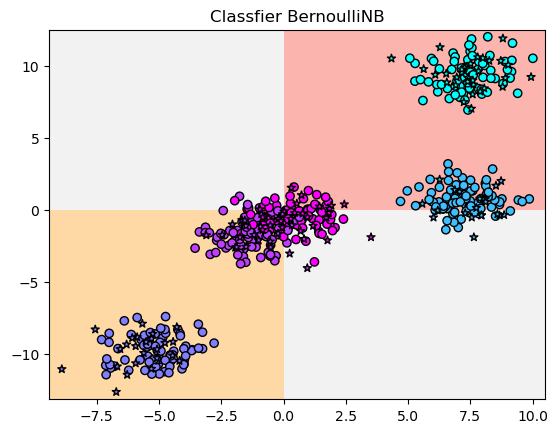

In [7]:
import matplotlib.pyplot as plt
#限定横轴与纵轴的最大值
x_min,x_max=X[:,0].min()-0.5,X[:,0].max()+0.5
y_min,y_max=X[:,1].min()-0.5,X[:,1].max()+0.5
#用不同背景颜色表示不同分类
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),
                  np.arange(y_min,y_max,.02))
z=nb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#将训练集和测试集用散点图表示
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classfier BernoulliNB')

在图5-7中，我们可以看到贝努利朴素贝叶斯的模型十分简单，它分别在横轴等于0和纵轴等于0的位置画了两条直线，再用这两条直线形成的4个象限对数据进行分类。这是因为我们使用了贝努利朴素贝叶斯的默认参数binarize=0.0，所以模型对于数据的判断是，如果特征1大于或等于0，且特征2大于或等于0，则将数据归为一类；如果特征1小于0，且特征2也小于0，则归为另一类而其余的数据全部归为第三类，难怪模型的得分这么差了。
高斯朴素贝叶斯，顾名思义，是假设样本的特征符合高斯分布，或者说符合正态分布时所用的算法。

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
print('模型得分：{:.3f}'.format(gnb.score(X_test,y_test)))

模型得分：0.968


Text(0.5, 1.0, 'Classfier GaussianNB')

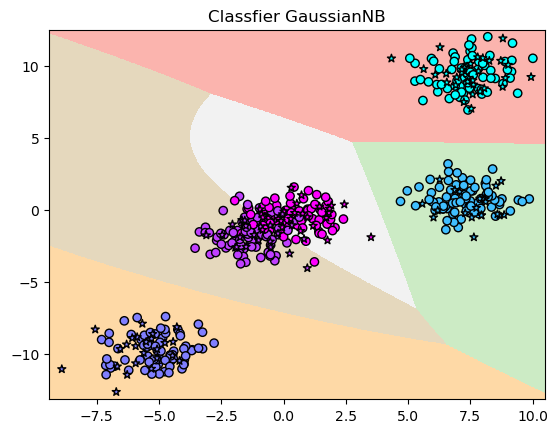

In [9]:
z=gnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#将训练集和测试集用散点图表示
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classfier GaussianNB')

高斯朴素贝叶斯也确实是能够胜任大部分的分类任务，这是因为在自然科学和社会科学领域，有大量的现象都是呈现出正态分布的状态。

In [10]:
#导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
#用多项式朴素贝叶斯拟合数据
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)
#提示信息告诉我们，输入的X值必须是非负的，这样的话，我们需要对数据进行一下预处理才行。

ValueError: Negative values in data passed to MultinomialNB (input X)

In [11]:
#导入多项式朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB
#导入数据处理工具
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#用多项式朴素贝叶斯拟合数据
mnb = MultinomialNB()
mnb.fit(X_train_scaled, y_train)
mnb.score(X_test_scaled, y_test)

0.32

Text(0.5, 1.0, 'Classfier MultinomialNB')

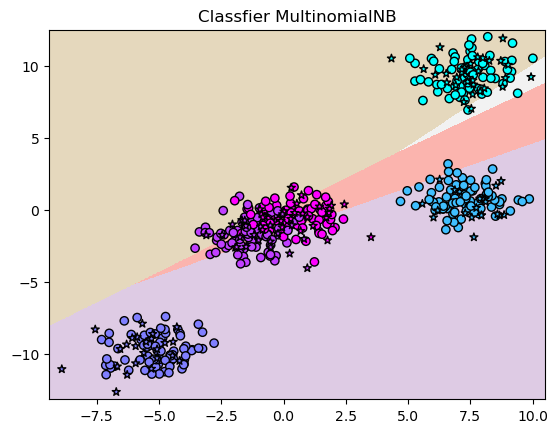

In [12]:
z=mnb.predict(np.c_[(xx.ravel(),yy.ravel())]).reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
#将训练集和测试集用散点图表示
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.cool,edgecolor='k')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.cool,marker='*',edgecolor='k')
plt.xlim=(xx.min(),xx.max())
plt.ylim=(yy.min(),yy.max())
plt.title('Classfier MultinomialNB')

可以看出多项式朴素贝叶斯所进行的分类确实比贝努利朴素贝叶斯的还要差一些，大部分数据点都被放到了错误的分类中。这是因为，多项式朴素贝叶斯只适合用来对非负离散数值特征进行分类，典型的例子就是对转化为向量后的文本数据进行分类。
MinMaxScaler的作用是将数据集中的特征值全部转化为0～1。
威斯康星乳腺肿瘤数据集是一个非常经典的用于医疗病情分析的数据集，它包括569个病例的数据样本，每个样本具有30个特征值，而样本共分为两类：分别是恶性（Malignant）和良性（Benign）。

In [13]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [14]:
#打印数据集中标注好的肿瘤分类
print('肿瘤的分类：',cancer['target_names'])
#打印数据集中的肿瘤特征名称
print('\n肿瘤的特征：\n',cancer['feature_names'])

肿瘤的分类： ['malignant' 'benign']

肿瘤的特征：
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
#用我们的直觉来分析的话，这个数据集的特征值并不属于二项式分布，也不属于多项式分布，所以这里我们选择使用高斯朴素贝叶斯（GaussianNB）。
#将数值和分类目标赋值给X和y
X,y=cancer.data,cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=38)
print('训练集数据形态：',X_train.shape)
print('测试集数据形态：',X_test.shape)
#训练集中有426个样本，而测试集中有143个样本，当然，特征数量都是30个。

训练集数据形态： (426, 30)
测试集数据形态： (143, 30)


In [16]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
print('训练集得分：{:.3f}'.format(gnb.score(X_train,y_train)))
print('测试集得分：{:.3f}'.format(gnb.score(X_test,y_test)))

训练集得分：0.948
测试集得分：0.944


In [17]:
#下面我们随便用其中一个样本（如第312个样本）让模型进行一下预测，看是否可以分到正确的分类中
print('模型预测的分类是：{}'.format(gnb.predict(X[[312]])))
print('正确的分类是：',y[312])

模型预测的分类是：[1]
正确的分类是： 1


贝努利朴素贝叶斯适合与二项式分布的数据集，而多项式朴素贝叶斯适合计数类型的数据集，即非负、离散数值的数据集，而高斯朴素贝叶斯适用的面就要广得多，它可以应用于任何连续数值型的数据集当中，当然如果是符合正态分布的数据集的话，高斯朴素贝叶斯模型的得分会更高。
相比起线性模型算法来说，朴素贝叶斯算法的效率要高一些，这是因为朴素贝叶斯算法会把数据集中的各个特征看作完全独立的，而不考虑特征之间的关联关系。但同时模型泛化的能力会稍微弱一点，不过一般情况下并不太影响实际的使用。尤其是在现在这个大数据时代，很多数据集的样本特征可能成千上万，这种情况下，模型的效率要比模型泛化性能多零点几个百分点的得分重要得多。在这种超高维度的数据集中，训练一个线性模型的时间可能会非常长，因此在这种情况下，朴素贝叶斯算法往往是一个更好的选择。

In [ ]:
#学习曲线（learning curve），指的是随着数据集样本数量的增加，模型的得分变化情况。
from sklearn.model_selection import learning_curve
#导入随机拆分工具
from sklearn.model_selection import ShuffleSplit
#定义函数绘制学习曲线
def plot_learning_curve(estimator,title,X,y,y_xianzhi=None,cv=None,
                       n_jobs=1,train_size=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if y_xianzhi is not None:
        plt.ylim(y_xianzhi)
        plt.xlabel('Training examples')
        plt.ylabel('Scores')
        train_sizes,train_scores,test_scores=learning_curve(
        estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
        train_scores_mean=np.mean(train_scores,axis=1)
        test_scores_mean=np.mean(test_scores,axis=1)
        plt.grid()
        plt.plot( train_sizes,train_scores_mean,'o-',color='r',
                label='Training score')
        plt.plot( train_sizes,test_scores_mean,'o-',color='r',
                label='Cross-validation score')
        plt.legend(loc='lower right')
        return plt
title='Learning Curve (Naive Bayes)'
#设定拆分数量
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
#设定模型为高斯朴素贝叶斯
estimator=GaussianNB()
plot_learning_curve(estimator,title,X,y,y_xianzhi=(.9,1.01),cv=cv,n_jobs=4)
#初学python，很容易犯这样的错误，即直接用set, list, tuple, dict, str, int, complex, float等作为变量名。
#这样会导致这些内置函数：set(), list(), tuple()等等无法执行。